# Light curves classification project

In [48]:
import sys
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

folder = ''
from Preprocessing import *
%matplotlib inline
tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.9)
config = tf.compat.v1.ConfigProto(
                                    intra_op_parallelism_threads=4,
                                    inter_op_parallelism_threads=4,
                                    allow_soft_placement=True,
                                    device_count = {'CPU' : 1,
                                                    'GPU' : 0}
                                   )
session = tf.compat.v1.Session(config=config)

## Retrieving data

In [49]:
rawData = pd.read_csv(folder+"datasets/training_set.csv")
rawData = rawData.sort_values(by=['object_id', 'passband'])
print('Row data (light curves) retrieved')
rawData

Row data (light curves) retrieved


object_id         mjd  passband        flux   flux_err  detected
54             615  59819.1532         0    6.878784   3.633152         0
55             615  59820.1047         0   39.364853   3.775619         1
56             615  59821.1026         0  -10.422381   4.172683         0
57             615  59822.1105         0  -65.485130   4.362876         1
58             615  59823.1505         0 -113.349159   4.069051         1
...            ...         ...       ...         ...        ...       ...
1421687  130779836  60515.2731         5  -81.113083  46.094658         0
1421693  130779836  60536.0451         5    5.653964  53.119434         0
1421697  130779836  60545.9844         5   32.006413  77.931732         0
1421698  130779836  60546.9804         5   68.152985  56.351048         0
1421702  130779836  60571.0225         5   30.593130  50.695290         0

[1421705 rows x 6 columns]

In [50]:
df_metadata = pd.read_csv(folder+"datasets/training_set_metadata.csv")
print(f'Metadata retrieved')
df_metadata

Metadata retrieved


object_id          ra       decl       gal_l      gal_b  ddf  \
0           615  349.046051 -61.943836  320.796530 -51.753706    1   
1           713   53.085938 -27.784405  223.525509 -54.460748    1   
2           730   33.574219  -6.579593  170.455585 -61.548219    1   
3           745    0.189873 -45.586655  328.254458 -68.969298    1   
4          1124  352.711273 -63.823658  316.922299 -51.059403    1   
...         ...         ...        ...         ...        ...  ...   
7843  130739978   26.718750 -14.940303  172.342697 -72.255675    0   
7844  130755807  120.101349 -62.696659  275.742955 -16.509746    0   
7845  130762946  203.108109 -55.682144  308.728904   6.727511    0   
7846  130772921   79.101562 -35.501846  239.172243 -33.827844    0   
7847  130779836  301.992188 -17.426323   25.102988 -24.511101    0   

      hostgal_specz  hostgal_photoz  hostgal_photoz_err  distmod  mwebv  \
0            0.0000          0.0000              0.0000      NaN  0.017   
1            1.8181          1.6267              0.2552  45.4063  0.007   
2            0.2320          0.2262              0.0157  40.2561  0.021   
3            0.3037          0.2813              1.1523  40.7951  0.007   
4            0.1934          0.2415              0.0176  40.4166  0.024   
...             ...             ...                 ...      ...    ...   
7843         0.0000          0.0000              0.0000      NaN  0.013   
7844         0.1725          2.5606              1.1146  46.6108  0.136   
7845         0.0000          0.0000              0.0000      NaN  0.430   
7846         0.0000          0.0000              0.0000      NaN  0.034   
7847         0.0000          0.0000              0.0000      NaN  0.091   

      target  
0         92  
1         88  
2         42  
3         90  
4         90  
...      ...  
7843      65  
7844      90  
7845      16  
7846      65  
7847       6  

[7848 rows x 12 columns]

In [51]:
print('Data and metadata merged')
df = df_metadata.merge(rawData, on='object_id')
print('Grouping the data.. ', end='')
groups = [df.sort_values(by=['passband', 'mjd']) 
          for _,df in df.groupby(['object_id'])]
print('and shuffling the objects..')
random.shuffle(groups)
df = pd.concat(groups).reset_index(drop=True)
df

Data and metadata merged
Grouping the data.. and shuffling the objects..


object_id          ra       decl       gal_l      gal_b  ddf  \
0        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
1        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
2        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
3        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
4        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
...            ...         ...        ...         ...        ...  ...   
1421700   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421701   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421702   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421703   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421704   22243191  319.725006 -52.801853  344.597702 -43.315773    0   

         hostgal_specz  hostgal_photoz  hostgal_photoz_err  distmod  mwebv  \
0               0.0931          0.1568              0.0494  39.3707  0.006   
1               0.0931          0.1568              0.0494  39.3707  0.006   
2               0.0931          0.1568              0.0494  39.3707  0.006   
3               0.0931          0.1568              0.0494  39.3707  0.006   
4               0.0931          0.1568              0.0494  39.3707  0.006   
...                ...             ...                 ...      ...    ...   
1421700         0.2051          0.2202              0.0206  40.1906  0.021   
1421701         0.2051          0.2202              0.0206  40.1906  0.021   
1421702         0.2051          0.2202              0.0206  40.1906  0.021   
1421703         0.2051          0.2202              0.0206  40.1906  0.021   
1421704         0.2051          0.2202              0.0206  40.1906  0.021   

         target         mjd  passband       flux   flux_err  detected  
0            15  59584.1107         0 -10.396806   7.365628         0  
1            15  59819.2888         0 -17.553297  12.003932         0  
2            15  59851.2095         0 -10.762570  10.343713         0  
3            15  59876.1323         0  -7.097991   9.910684         0  
4            15  59968.1022         0  -4.672082   5.988404         0  
...         ...         ...       ...        ...        ...       ...  
1421700      15  60540.1693         5  -8.238038  27.933731         0  
1421701      15  60541.0658         5  21.988062  16.774469         0  
1421702      15  60565.9932         5  -5.474984  29.381100         0  
1421703      15  60567.0258         5   1.945290  16.037388         0  
1421704      15  60597.0011         5 -14.251052  40.184498         0  

[1421705 rows x 17 columns]

## Explorative data analysis

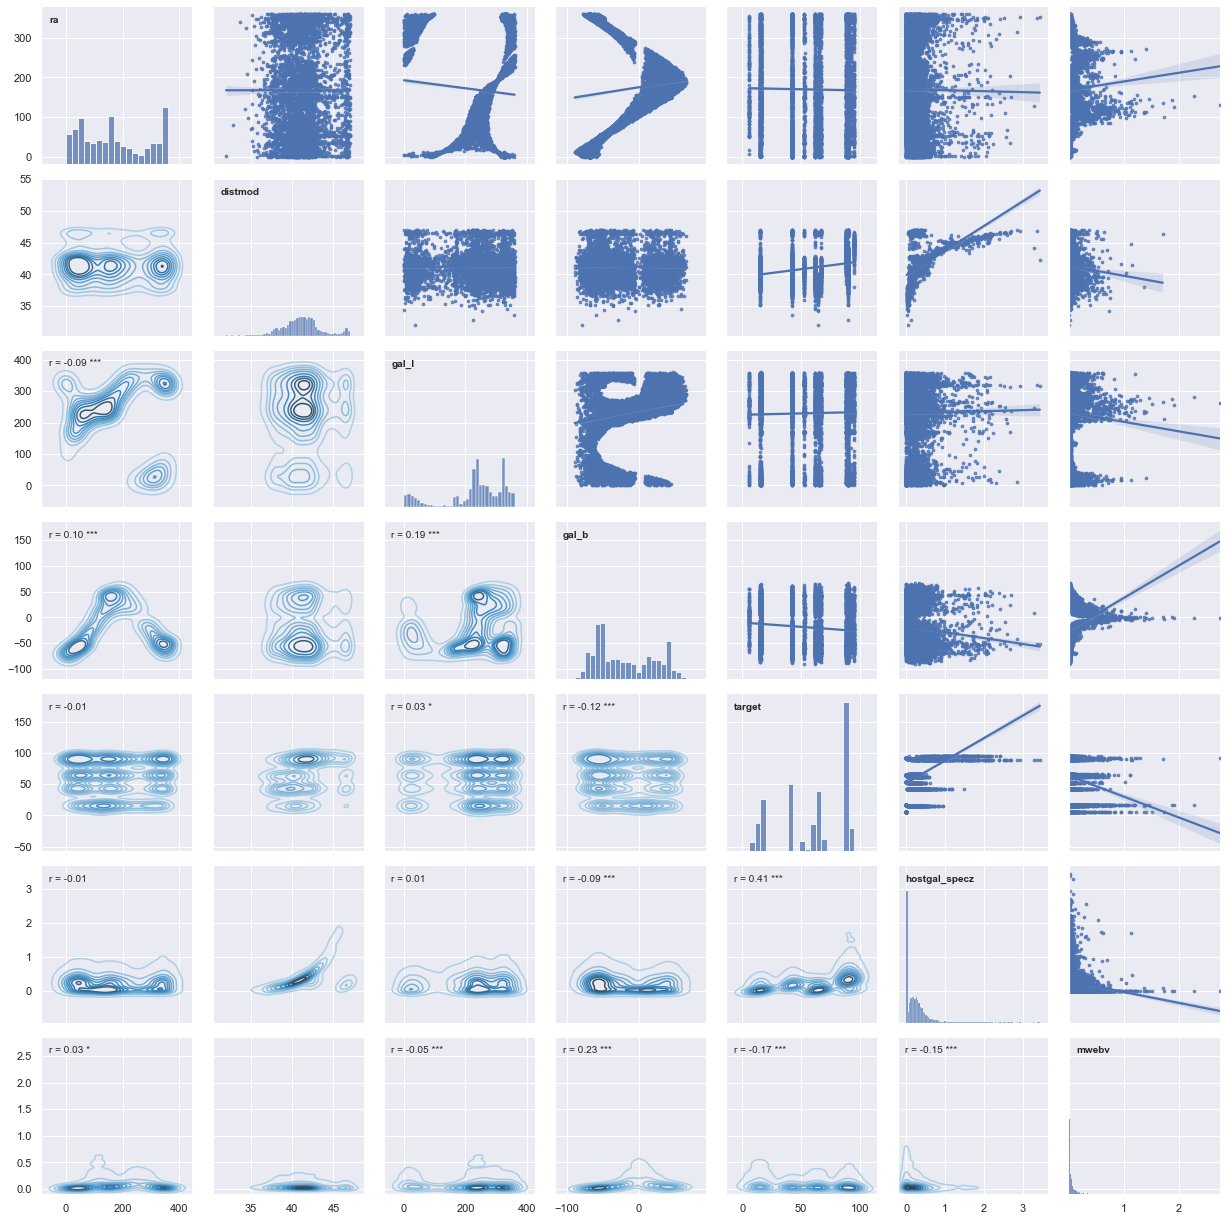

In [277]:
cor_plots(df_metadata[['ra', 'distmod', 'gal_l', 'gal_b', 
                       'target', 'hostgal_specz', 'mwebv']], 
          dir_path=folder+'images', show=True)

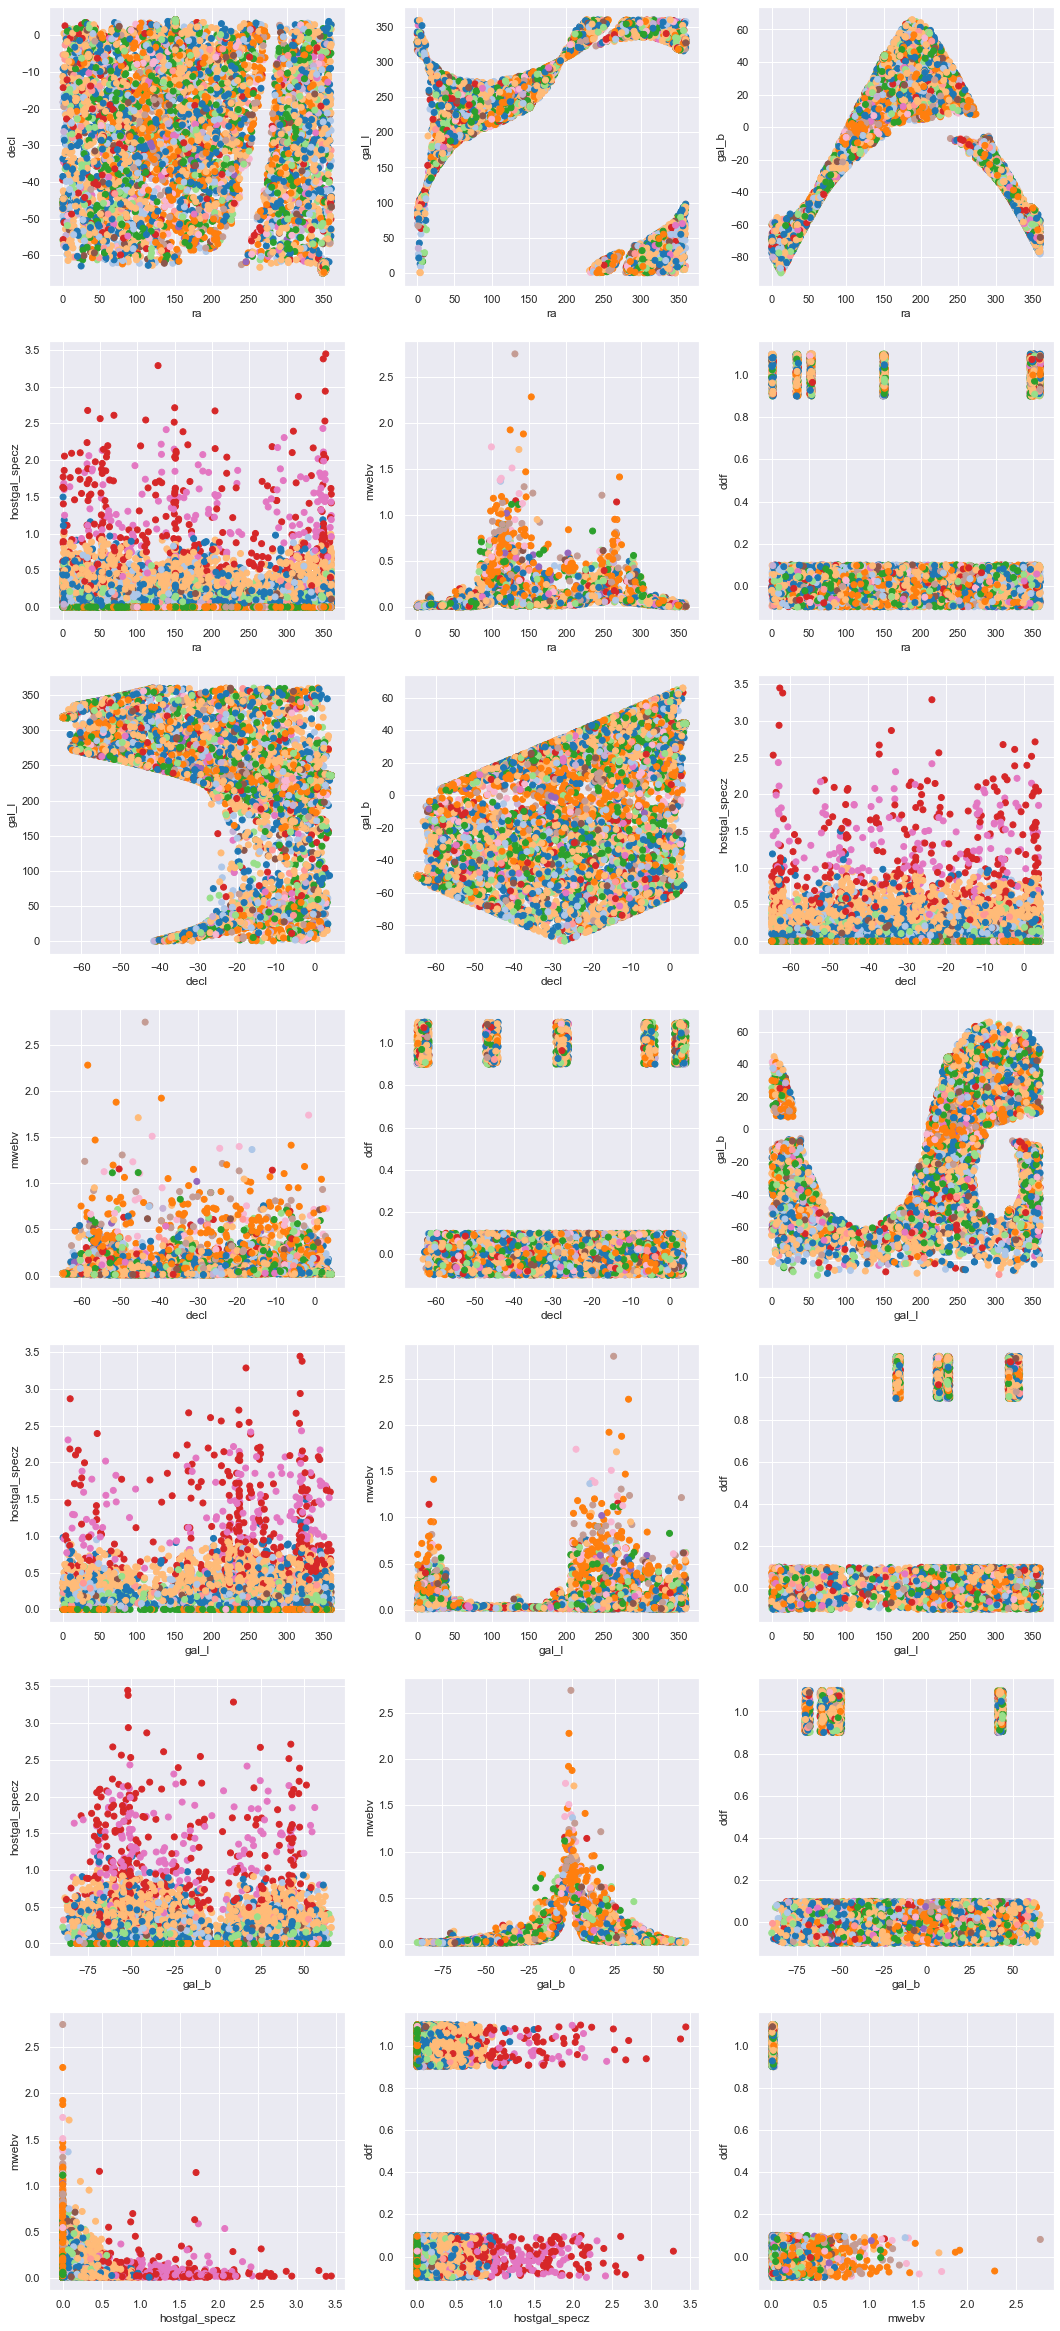

In [309]:
paired_plots(df_metadata[['ra', 'decl', 'gal_l', 'gal_b', 
                          'hostgal_specz', 'mwebv', 'ddf', 'target']], 
             hue='target', dir_path=folder+'images', show=True)

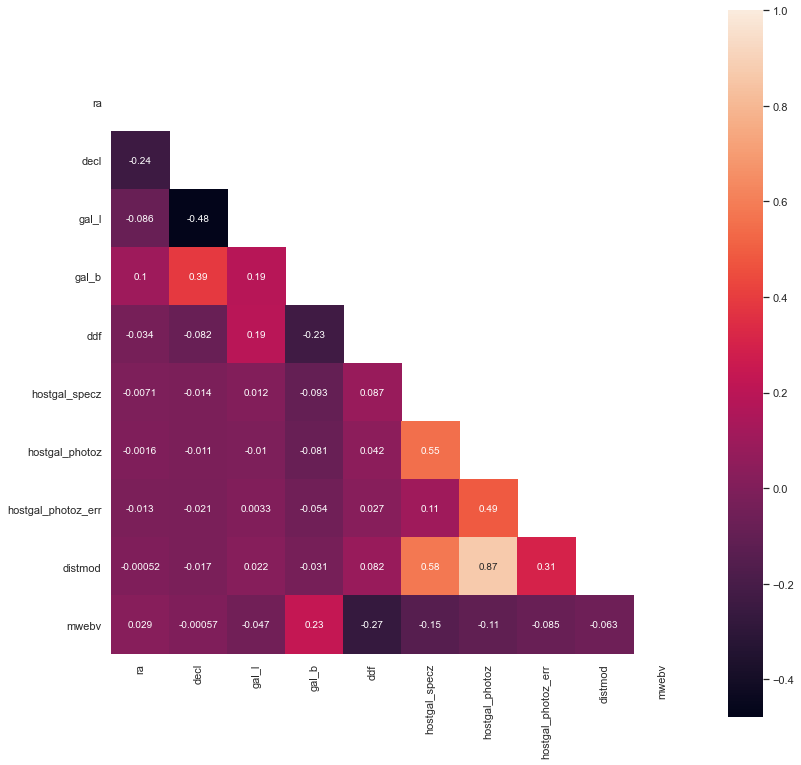

In [5]:
correlationMatrix(df_metadata)

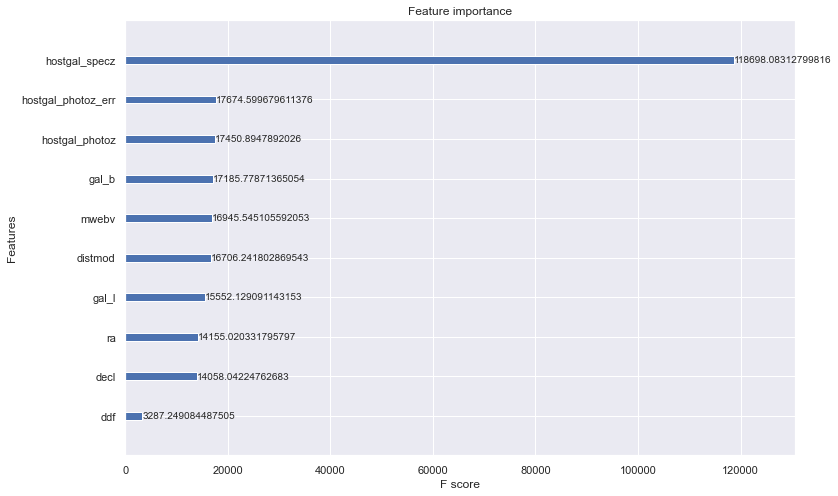

In [8]:
x = df_metadata.drop(['object_id', 'target'], axis = 1)
y = df_metadata['target'].values

fig, ax = plt.subplots(figsize=(12, 8))
model = XGBClassifier(eval_metric='mlogloss', num_parallel_tree=5)
model.fit(x, y)
plot = plot_importance(model, importance_type='total_gain', ax=ax)
plt.show()

In [52]:
completeness = all(df.groupby("object_id")["passband"].nunique() == 6)
print(f'Every object has at least one sample in each passband: {completeness}')

Every object has at least one sample in each passband: True


In [53]:
print('\nQuick look at the most important features of the metadata set')
df_metadata.drop(['ddf', 'distmod', 'hostgal_photoz', 'hostgal_photoz_err'], 
                 axis = 1)


Quick look at the most important features of the metadata set


object_id          ra       decl       gal_l      gal_b  hostgal_specz  \
0           615  349.046051 -61.943836  320.796530 -51.753706         0.0000   
1           713   53.085938 -27.784405  223.525509 -54.460748         1.8181   
2           730   33.574219  -6.579593  170.455585 -61.548219         0.2320   
3           745    0.189873 -45.586655  328.254458 -68.969298         0.3037   
4          1124  352.711273 -63.823658  316.922299 -51.059403         0.1934   
...         ...         ...        ...         ...        ...            ...   
7843  130739978   26.718750 -14.940303  172.342697 -72.255675         0.0000   
7844  130755807  120.101349 -62.696659  275.742955 -16.509746         0.1725   
7845  130762946  203.108109 -55.682144  308.728904   6.727511         0.0000   
7846  130772921   79.101562 -35.501846  239.172243 -33.827844         0.0000   
7847  130779836  301.992188 -17.426323   25.102988 -24.511101         0.0000   

      mwebv  target  
0     0.017      92  
1     0.007      88  
2     0.021      42  
3     0.007      90  
4     0.024      90  
...     ...     ...  
7843  0.013      65  
7844  0.136      90  
7845  0.430      16  
7846  0.034      65  
7847  0.091       6  

[7848 rows x 8 columns]

## Preprocessing

In [54]:
norm_data = normalize_fluxes(df=df)
new_metadata = updateMetadata(data=norm_data, metadata=df_metadata)
norm_data

object_id          ra       decl       gal_l      gal_b  ddf  \
0        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
1        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
2        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
3        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
4        125618728   59.765625 -29.484461  227.640195 -48.913488    0   
...            ...         ...        ...         ...        ...  ...   
1421700   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421701   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421702   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421703   22243191  319.725006 -52.801853  344.597702 -43.315773    0   
1421704   22243191  319.725006 -52.801853  344.597702 -43.315773    0   

         hostgal_specz  hostgal_photoz  hostgal_photoz_err  distmod  mwebv  \
0               0.0931          0.1568              0.0494  39.3707  0.006   
1               0.0931          0.1568              0.0494  39.3707  0.006   
2               0.0931          0.1568              0.0494  39.3707  0.006   
3               0.0931          0.1568              0.0494  39.3707  0.006   
4               0.0931          0.1568              0.0494  39.3707  0.006   
...                ...             ...                 ...      ...    ...   
1421700         0.2051          0.2202              0.0206  40.1906  0.021   
1421701         0.2051          0.2202              0.0206  40.1906  0.021   
1421702         0.2051          0.2202              0.0206  40.1906  0.021   
1421703         0.2051          0.2202              0.0206  40.1906  0.021   
1421704         0.2051          0.2202              0.0206  40.1906  0.021   

         target         mjd  passband      flux  flux_err  detected  \
0            15  59584.1107         0 -0.563627 -0.383066         0   
1            15  59819.2888         0 -0.636375 -0.335916         0   
2            15  59851.2095         0 -0.567345 -0.352792         0   
3            15  59876.1323         0 -0.530093 -0.357194         0   
4            15  59968.1022         0 -0.505433 -0.397066         0   
...         ...         ...       ...       ...       ...       ...   
1421700      15  60540.1693         5 -0.424587  0.693081         0   
1421701      15  60541.0658         5  0.509366  0.348272         0   
1421702      15  60565.9932         5 -0.339212  0.737803         0   
1421703      15  60567.0258         5 -0.109934  0.325497         0   
1421704      15  60597.0011         5 -0.610383  1.071616         0   

              mean        std  
0        45.049194  98.373645  
1        45.049194  98.373645  
2        45.049194  98.373645  
3        45.049194  98.373645  
4        45.049194  98.373645  
...            ...        ...  
1421700   5.503138  32.363598  
1421701   5.503138  32.363598  
1421702   5.503138  32.363598  
1421703   5.503138  32.363598  
1421704   5.503138  32.363598  

[1421705 rows x 19 columns]

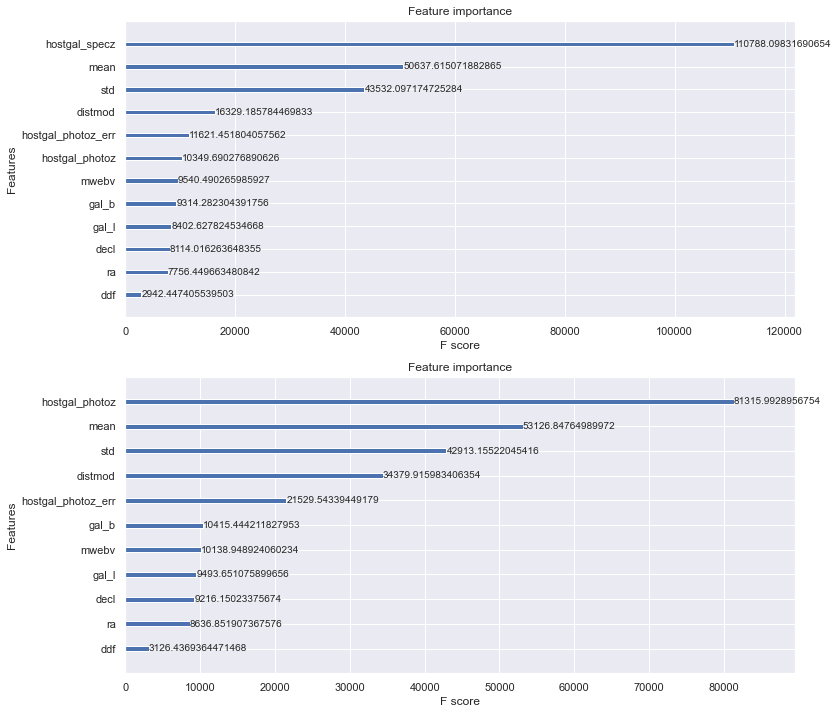

In [57]:
x1 = new_metadata.drop(['object_id', 'target'], axis = 1)
x2 = new_metadata.drop(['object_id', 'target', 'hostgal_specz'], axis = 1)
y = new_metadata['target'].values

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
model1 = XGBClassifier(eval_metric='mlogloss', num_parallel_tree=5)
model1.fit(x1, y)
model2 = XGBClassifier(eval_metric='mlogloss', num_parallel_tree=5)
model2.fit(x2, y)
plot = plot_importance(model1, importance_type='total_gain', ax=ax[0])
plot = plot_importance(model2, importance_type='total_gain', ax=ax[1])
plt.show()

Target distribution:


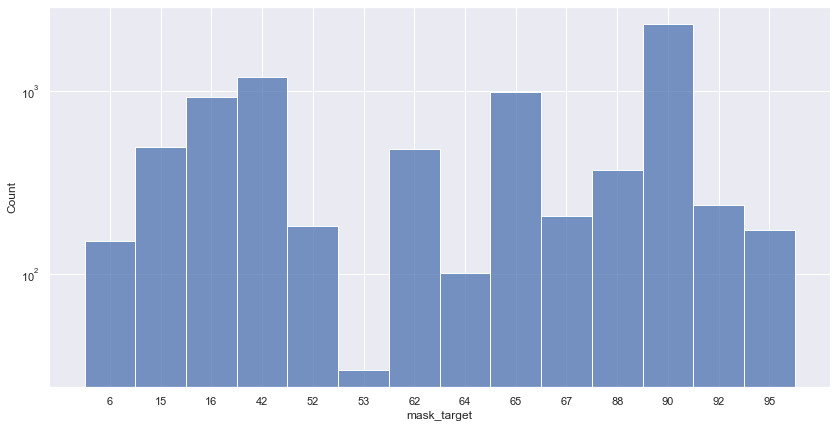

Target distribution:

target 6 -> number: 151  <=>  1.9%
target 15 -> number: 495  <=>  6.3%
target 16 -> number: 924  <=>  11.8%
target 42 -> number: 1193  <=>  15.2%
target 52 -> number: 183  <=>  2.3%
target 53 -> number: 30  <=>  0.4%
target 62 -> number: 484  <=>  6.2%
target 64 -> number: 102  <=>  1.3%
target 65 -> number: 981  <=>  12.5%
target 67 -> number: 208  <=>  2.7%
target 88 -> number: 370  <=>  4.7%
target 90 -> number: 2313  <=>  29.5%
target 92 -> number: 239  <=>  3.0%
target 95 -> number: 175  <=>  2.2%


In [14]:
list_of_targets = pd.unique(df_metadata["target"]).tolist()
list_of_targets.sort()
distribution = plotTargetDistr(df_metadata, targets=list_of_targets)

In [15]:
reduced_data = reduce_dataset(norm_data, n_points=10, 
                              n_bands=1, dir_path=folder+'datasets')
reduced_data

Reducing: 100.0%      Creating the dataframe..
Saving to local..
Reduced dataset successfully saved!


object_id          ra       decl       gal_l      gal_b  ddf  \
0           30191.0  150.117188   2.238686  236.784618  42.139082  1.0   
1           30191.0  150.117188   2.238686  236.784618  42.139082  1.0   
2           30191.0  150.117188   2.238686  236.784618  42.139082  1.0   
3           30191.0  150.117188   2.238686  236.784618  42.139082  1.0   
4           30191.0  150.117188   2.238686  236.784618  42.139082  1.0   
...             ...         ...        ...         ...        ...  ...   
1421348  60591506.0   96.428574 -44.003082  252.063416 -22.859511  0.0   
1421349  60591506.0   96.428574 -44.003082  252.063416 -22.859511  0.0   
1421350  60591506.0   96.428574 -44.003082  252.063416 -22.859511  0.0   
1421351  60591506.0   96.428574 -44.003082  252.063416 -22.859511  0.0   
1421352  60591506.0   96.428574 -44.003082  252.063416 -22.859511  0.0   

         hostgal_specz  hostgal_photoz  hostgal_photoz_err  distmod  mwebv  \
0               1.5405          1.3073              0.1521  44.8201  0.016   
1               1.5405          1.3073              0.1521  44.8201  0.016   
2               1.5405          1.3073              0.1521  44.8201  0.016   
3               1.5405          1.3073              0.1521  44.8201  0.016   
4               1.5405          1.3073              0.1521  44.8201  0.016   
...                ...             ...                 ...      ...    ...   
1421348         0.0000          0.0000              0.0000      NaN  0.050   
1421349         0.0000          0.0000              0.0000      NaN  0.050   
1421350         0.0000          0.0000              0.0000      NaN  0.050   
1421351         0.0000          0.0000              0.0000      NaN  0.050   
1421352         0.0000          0.0000              0.0000      NaN  0.050   

         target         mjd  passband      flux  flux_err  detected  \
0          88.0  59582.3282       0.0 -0.684970 -0.472811       0.0   
1          88.0  59583.2409       0.0 -0.520311 -0.469279       0.0   
2          88.0  59584.2432       0.0 -0.495826 -0.469167       0.0   
3          88.0  59585.2363       0.0 -0.465031 -0.467573       0.0   
4          88.0  59586.2371       0.0 -0.357022 -0.464752       0.0   
...         ...         ...       ...       ...       ...       ...   
1421348    65.0  60571.3098       5.0  1.808181  0.747000       0.0   
1421349    65.0  60599.2391       5.0 -0.183466  0.783158       0.0   
1421350    65.0  60626.1564       5.0 -0.111303  0.804152       0.0   
1421351    65.0  60627.1686       5.0 -2.769354  0.861548       0.0   
1421352    65.0  60628.1562       5.0  0.362500  0.656520       0.0   

              mean        std       dT  
0        51.864748  93.519865   0.0000  
1        51.864748  93.519865   0.9127  
2        51.864748  93.519865   1.0023  
3        51.864748  93.519865   0.9931  
4        51.864748  93.519865   1.0008  
...            ...        ...      ...  
1421348   3.511255  30.101789  24.8884  
1421349   3.511255  30.101789  27.9293  
1421350   3.511255  30.101789  26.9173  
1421351   3.511255  30.101789   1.0122  
1421352   3.511255  30.101789   0.9876  

[1421353 rows x 20 columns]

Target distribution:


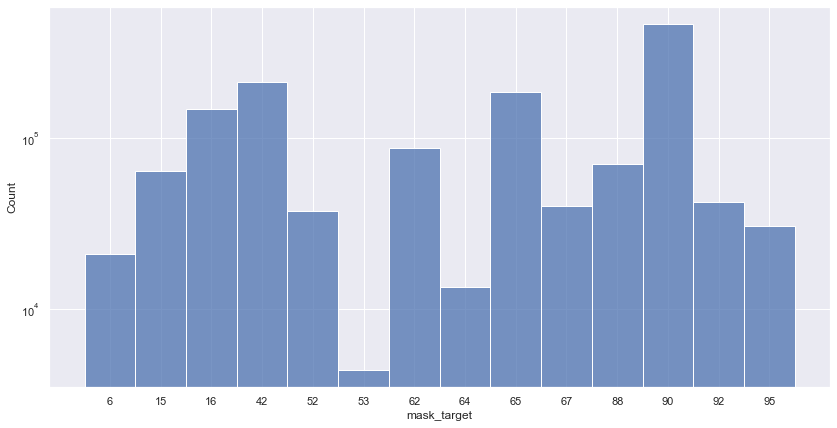

Target distribution:

target 6 -> number: 20830  <=>  1.5%
target 15 -> number: 64440  <=>  4.5%
target 16 -> number: 147474  <=>  10.4%
target 42 -> number: 212447  <=>  14.9%
target 52 -> number: 37480  <=>  2.6%
target 53 -> number: 4391  <=>  0.3%
target 62 -> number: 87079  <=>  6.1%
target 64 -> number: 13418  <=>  0.9%
target 65 -> number: 185894  <=>  13.1%
target 67 -> number: 39887  <=>  2.8%
target 88 -> number: 70622  <=>  5.0%
target 90 -> number: 464694  <=>  32.7%
target 92 -> number: 41985  <=>  3.0%
target 95 -> number: 30712  <=>  2.2%


In [16]:
distr_reduced = plotTargetDistr(reduced_data, targets=list_of_targets)

Overall number of sampled points per band


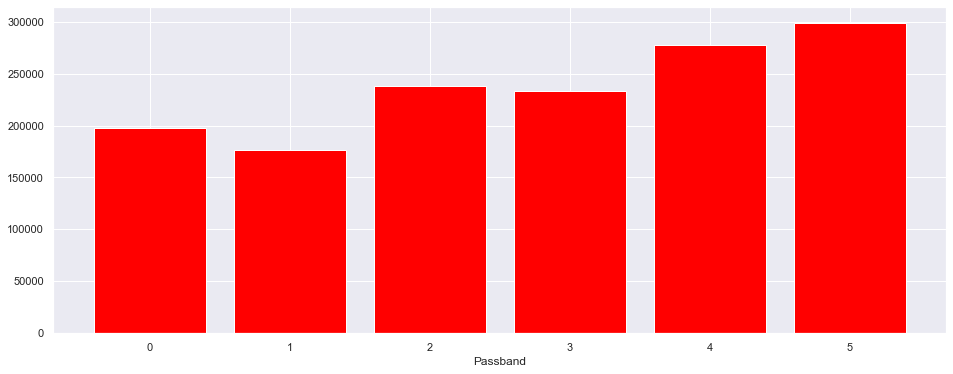

In [17]:
print('Overall number of sampled points per band')
prop = getProportions_perBand(norm_data, show=True)

## Re-sampling through B-splines methods

Class: 6


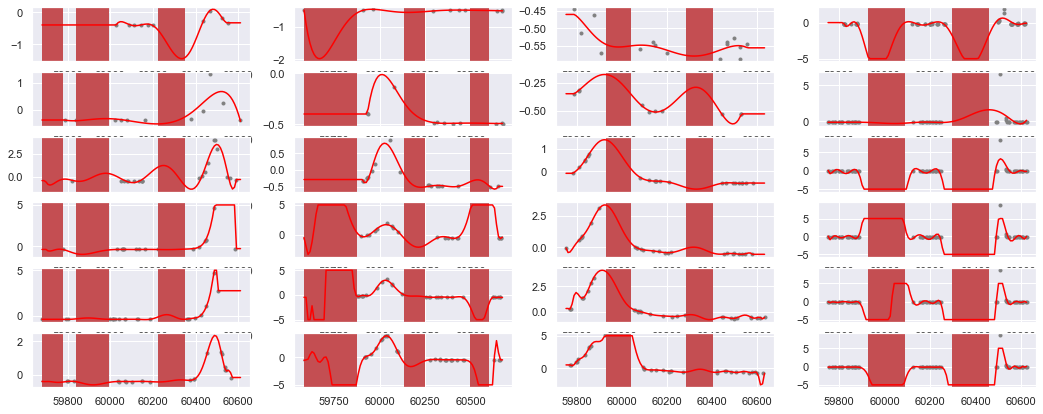

Class: 15


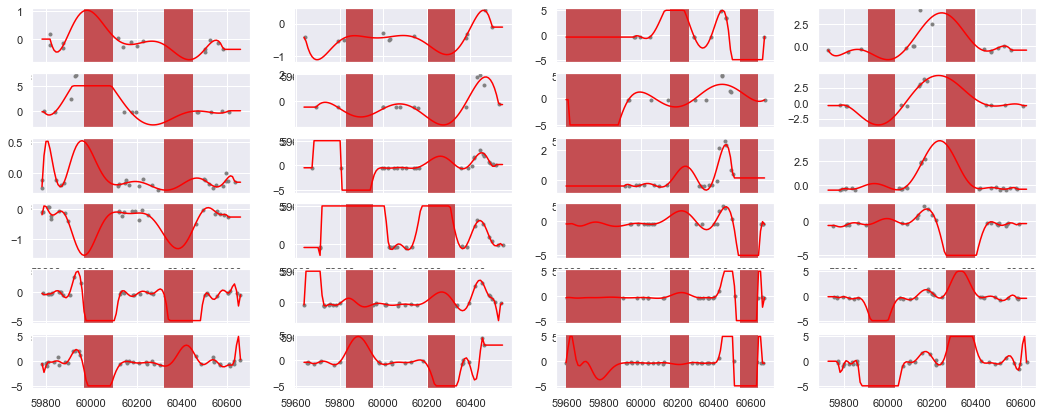

Class: 16


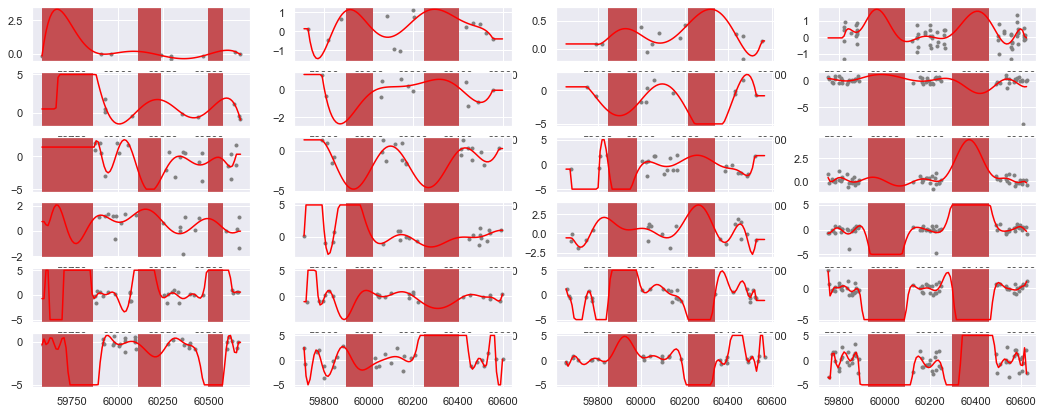

Class: 42


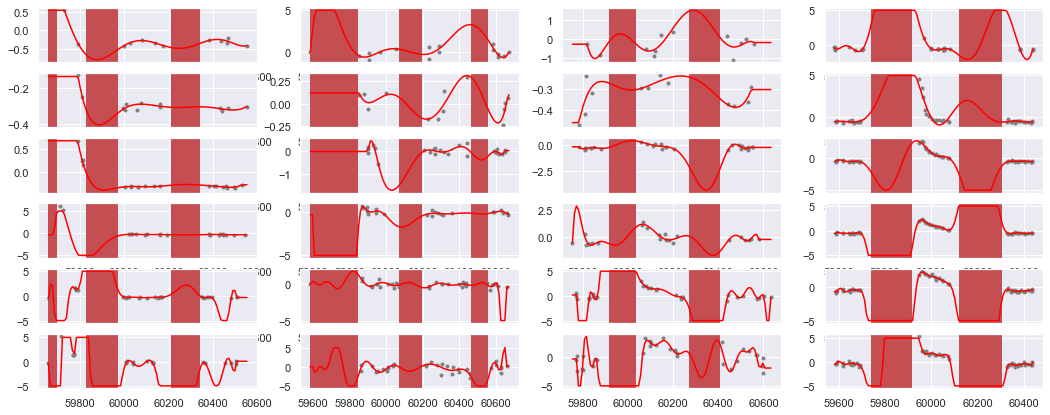

Class: 52


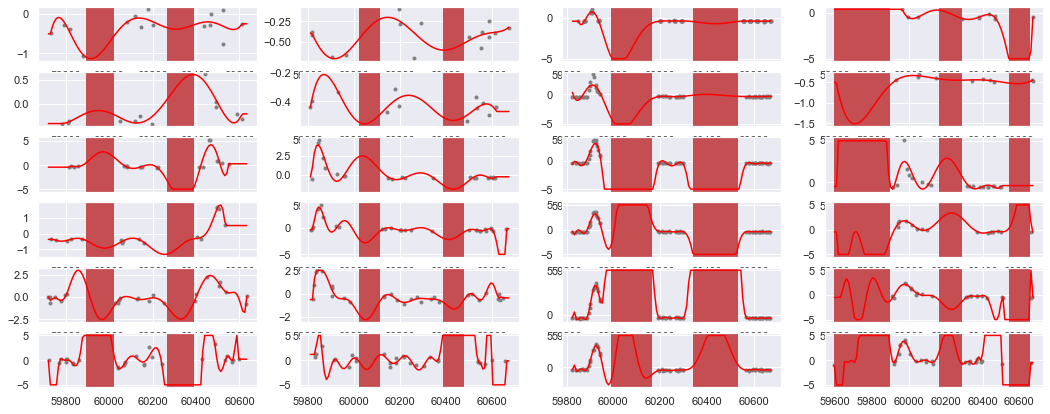

Class: 53


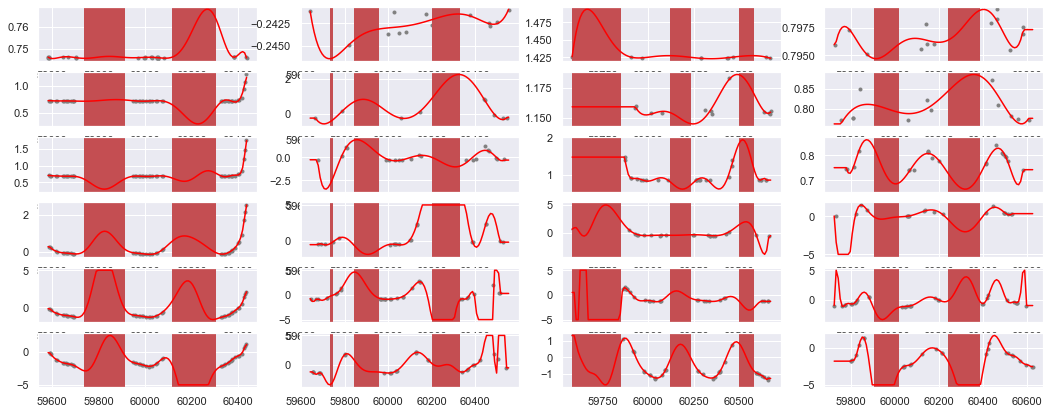

Class: 62


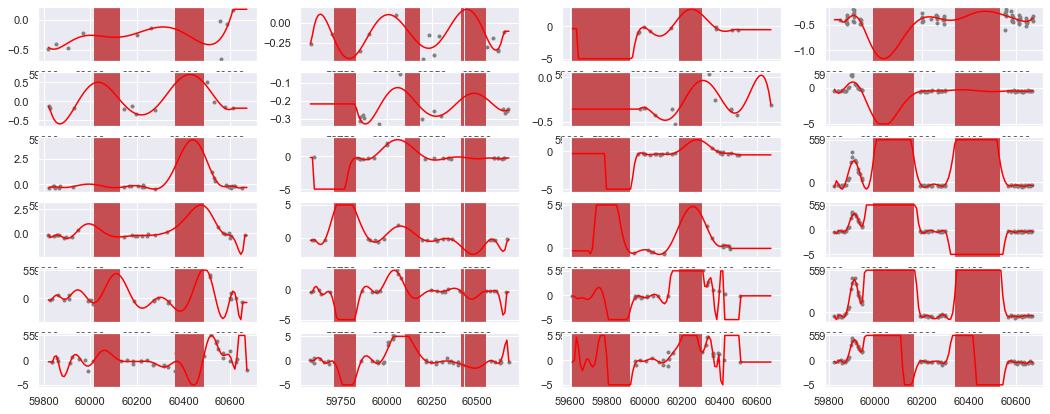

Class: 64


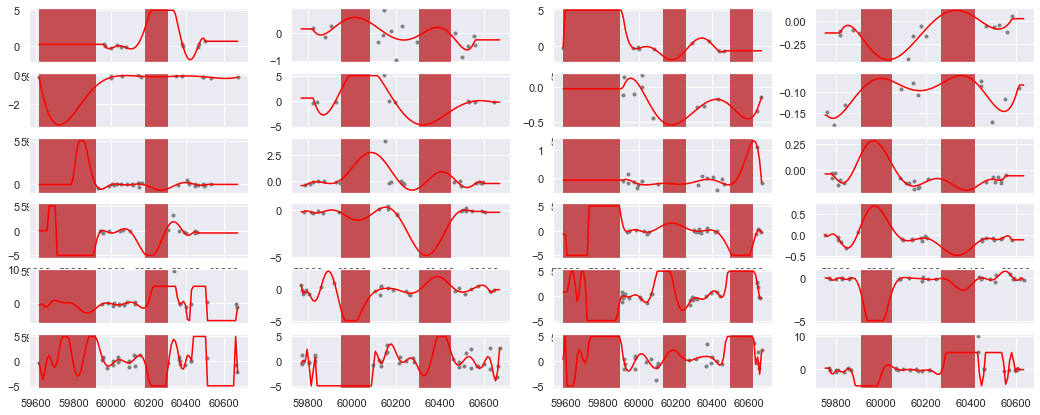

Class: 65


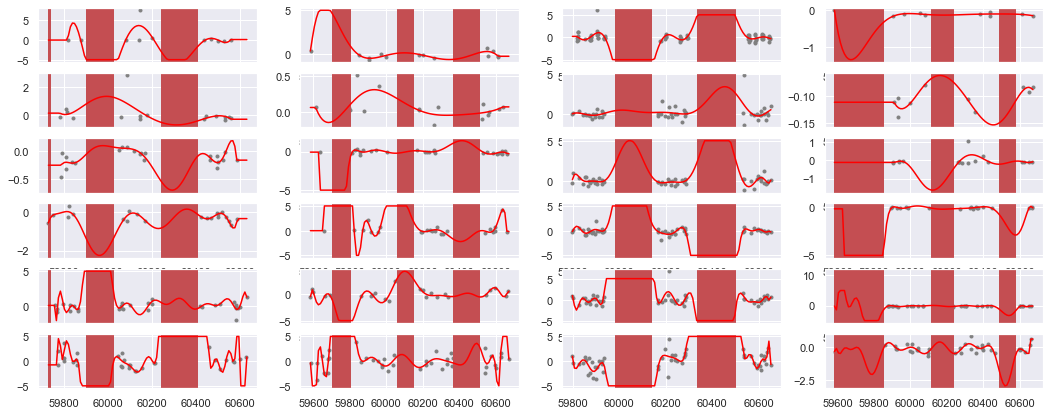

Class: 67


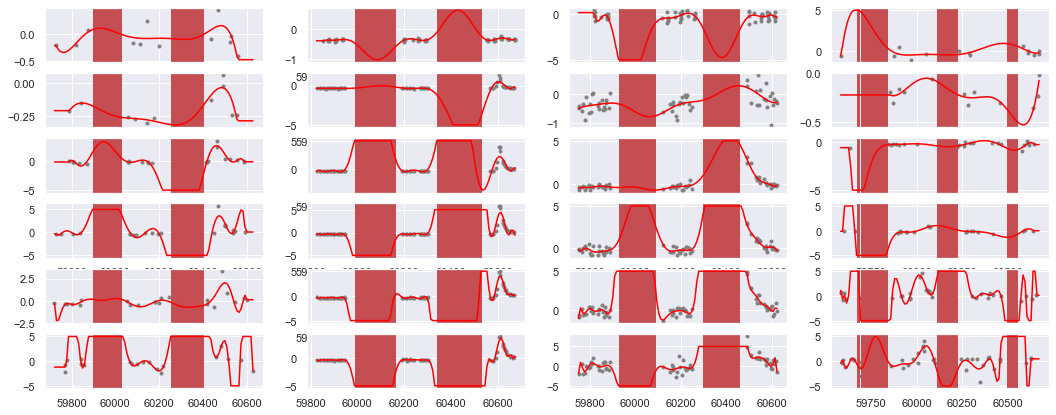

Class: 88


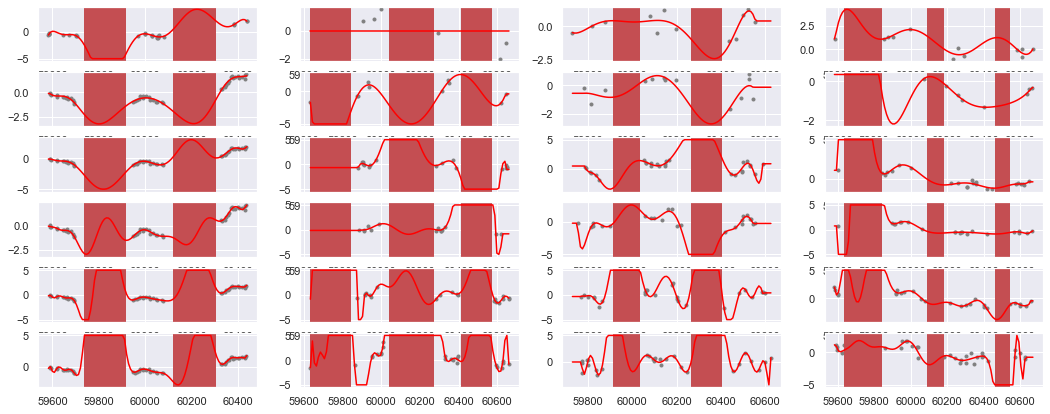

Class: 90


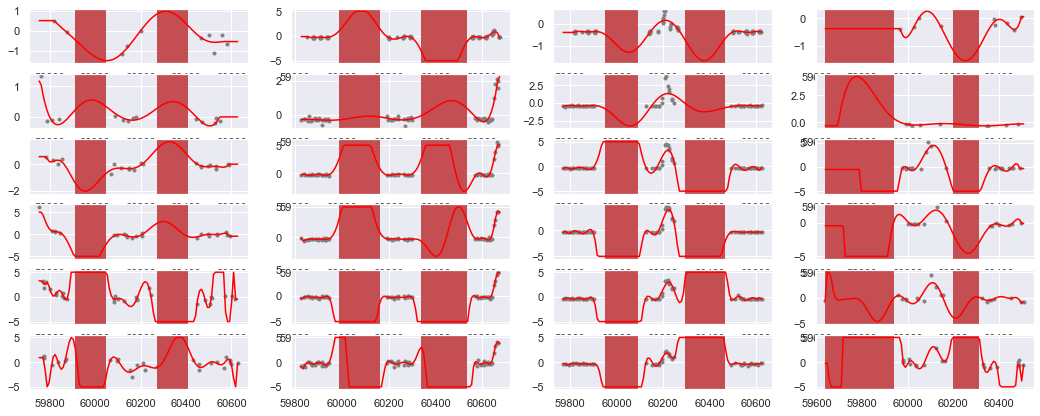

Class: 92


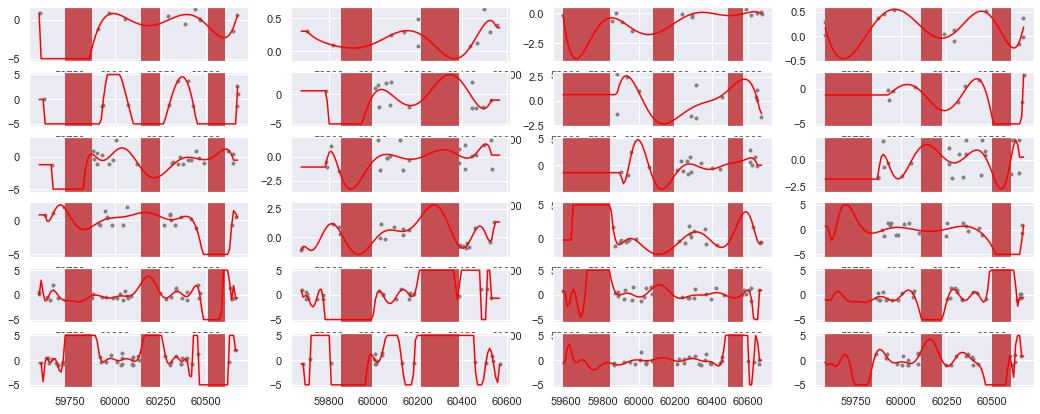

Class: 95


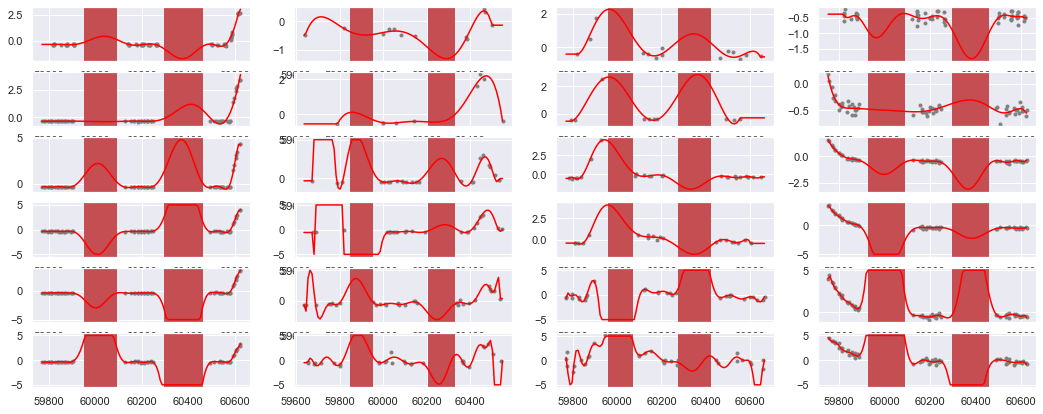

In [19]:
params = spl_param(threshold=40, weights=prop)
params.newParam(band=0, K=6, Ord=5)
params.newParam(band=1, K=6, Ord=4)
params.newParam(band=2, K=8, Ord=6)
params.newParam(band=3, K=10, Ord=7)
params.newParam(band=4, K=12, Ord=8)
params.newParam(band=5, K=12, Ord=9)

list_of_targets = pd.unique(df_metadata["target"]).tolist()
list_of_targets.sort()
plots = []
for class_ in list_of_targets:
    plots.append(plotSeries(reduced_data, class_=class_, params=params, n_points=300, n=4))

Some examples on how the score system works


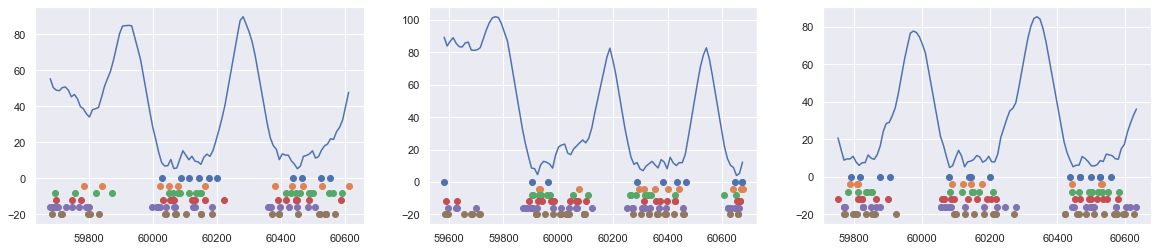

In [20]:
print('Some examples on how the score system works')
evalFidelityExample(plots[0])

In [88]:
params_save = spl_param(threshold=40, weights=prop)
params_save.newParam(band=0, K=6, Ord=4)\
.newParam(band=1, K=6, Ord=5)\
.newParam(band=2, K=8, Ord=6)\
.newParam(band=3, K=10, Ord=7)\
.newParam(band=4, K=12, Ord=8)\
.newParam(band=5, K=12, Ord=9)

tens = createTensors(norm_data, new_metadata, errFlux=False, 
                     dir_path=folder+'datasets', n_points=300, 
                     params=params_save)
print('Tensors created')

Creating the reference system..
Preprocessing on the object 7848 out of 7848 ... 100.0%      remaining time: 0s  elapsed: 198min              
Preprocessing completed!
Saving flux_tensor
at datasets/flux.csv
Saving normalized data
Tensors successfully saved
Tensors created


# Analysis and models

In [2]:
from Modeling import *
%matplotlib inline

print('Loading normalized data..')
norm_data = pd.read_csv(folder+'datasets/normalized_data.csv', sep=';')
print('Loading flux data..')
flux_tensor, proc_metadata = loadLocal(folder+'datasets/flux.csv')
spline_tensor = pushMasked(flux_tensor, mask_val=-10.)
print('Loading flux_err data..')
try:
    flux_err_tensor, proc_metadata = loadLocal(folder+'datasets/flux_err.csv')
except:
    print('No flux_err dataset found')
metadata = retrieveMetadata(proc_metadata)
print('Loading reduced data..')
reduced_data = pd.read_csv(folder+'datasets/reduced_data.csv', sep=';')
reduced_metadata = retrieveReducedMetadata(reduced_data, metadata)

print(f'Metadata (shape: {metadata.shape}) and flux tensors (shape: {flux_tensor.shape}) loaded from local.')

Functions for the modeling and evaluation phase successfully imported!
Loading normalized data..
Loading flux data..
Loading object 7848 out of 7848          
Loading flux_err data..
No flux_err dataset found
Loading reduced data..
Metadata (shape: (7848, 14)) and flux tensors (shape: (7848, 7, 300)) loaded from local.


Series lenght distribution:


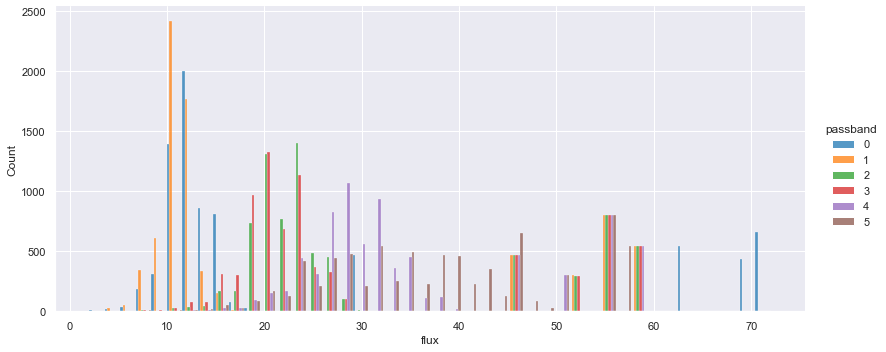

In [22]:
grouped = df.groupby(['object_id', 'passband']).count().reset_index()
sns.displot(grouped, x='flux', hue='passband', multiple="dodge", aspect=2.3, palette=sns.color_palette("tab10", 6))
print('Series lenght distribution:')

In [3]:
input_tensor, residuals, n_cutted_series = create_tensor(reduced_data, lenght=72, mask_val=-10.)
target = reduced_data['target'].values
meta = reduced_metadata.drop(['distmod', 'target'], axis=1)
meta_comp = metadata.drop(['distmod', 'target'], axis=1)
print(f'Input tensor shape: {input_tensor.shape}   cutted points = {residuals}   cutted series = {n_cutted_series}\n'+
      f'Metadata tensor shape: {meta.shape}\nTarget shape: {target.shape}')

Tensor creation: 100.0%      ->  aggregation..   Done!
Tensor shape: (47082, 72, 2)
Input tensor shape: (47082, 72, 2)   cutted points = 0   cutted series = 0
Metadata tensor shape: (7847, 12)
Target shape: (1421353,)


In [4]:
print('Data preparation for the deep learning architectures.\n-Input tensors for the autoencoder-\nTensors shape:')
data_encoder = k_data(X=input_tensor, dT=input_tensor[:,:,1], Y=input_tensor[:,:,0])
shapes = data_encoder.getShapes(print_=True)

Data preparation for the deep learning architectures.
-Input tensors for the autoencoder-
Tensors shape:
x_train: (37665, 72, 2)
dT_train: (37665, 72)
y_train: (37665, 72)
x_test: (9417, 72, 2)
dT_test: (9417, 72)
y_test: (9417, 72)



## LSTM - Autoencoder model

Trying to load a previous model
Model scheme -> LSTM - AutoEncoder


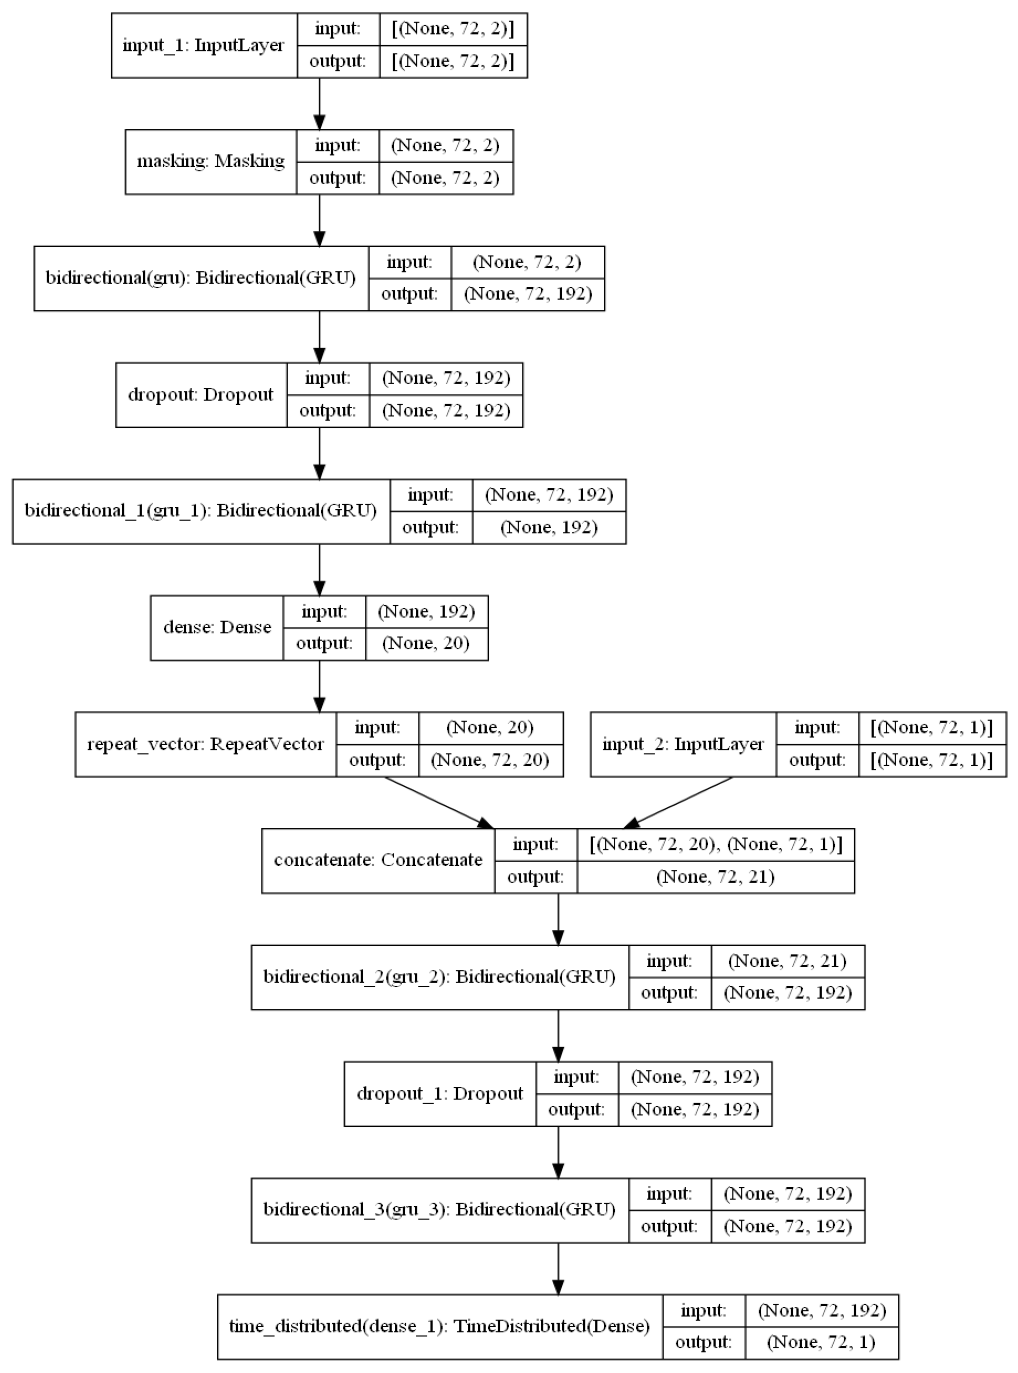

Model imported
[LSTM - AutoEncoder] model ready!


In [6]:
def custom_mse(mask_value):
    def loss(y_true, y_pred):
        # calculating squared difference between target and predicted values
        loss_ = keras.backend.square(y_pred - y_true)
        # multiplying the values with weights along batch dimension
        loss_ = loss_ * tf.cast((y_true != mask_value), tf.float32) 
        # summing both loss values along batch dimension 
        loss_ = keras.backend.mean(loss_, axis = 1)
        return loss_
    return loss

params = {'batch_size': 32, 'eval_batch':1, 'epochs': 30, 'verbose': None, 'validation_split': 0.2, 
          'n_bottleneck': 20, 'loss': custom_mse(mask_value=-10.)}
auto_enc, enc = runDeepModel(data_encoder, fold=folder, name='LSTM - AutoEncoder', params=params, 
                             force_train=False, save_model=False, show_plots=True)[0]

Real vs Rebuilt sequences


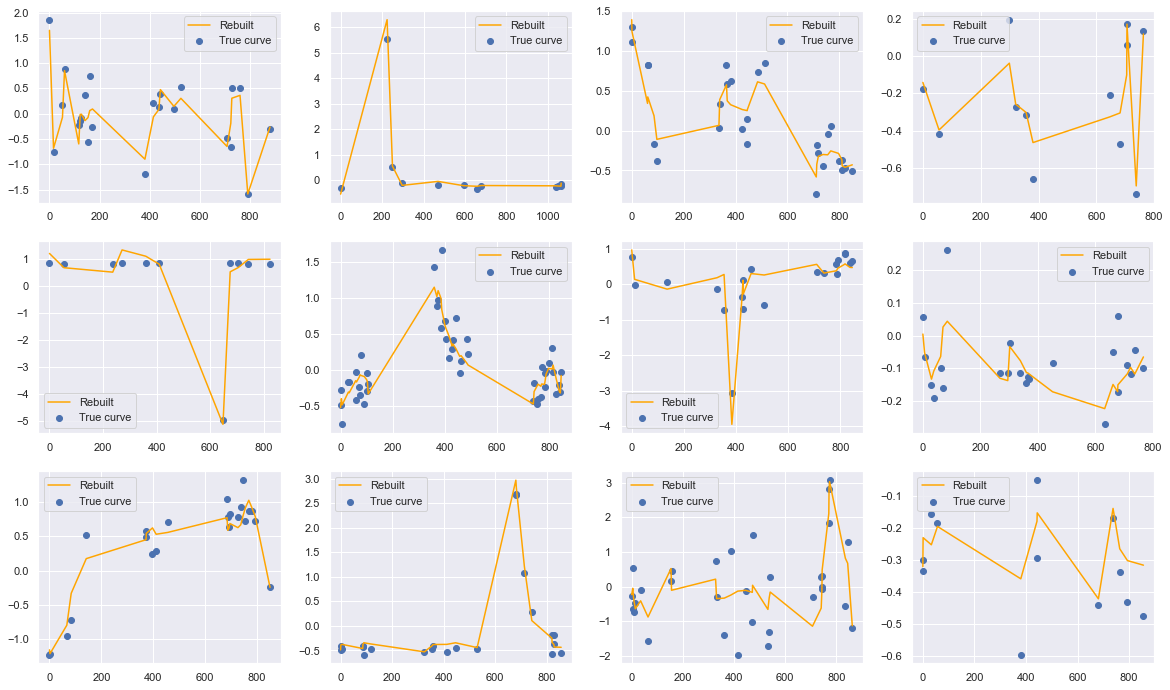

In [7]:
plotRebuiltSeries(model=auto_enc, data=data_encoder, n_series=12, dir_path=folder + 'models')

In [13]:
print('Encoding data for the Convolutional Neural Network..  ', end='')
n_bands = len(np.unique(reduced_data['passband'].values))
cnn_input = encodeData(enc, input_tensor, metadata=meta.values, target=reduced_metadata['target'].values, n_bands=n_bands, 
                       name='reduced')

print('Encoding data for the Exotic Architecture..  ', end='')
exotic_input = encodeData(None, spline_tensor, metadata=meta_comp.values, target=metadata['target'].values, 
                          n_bands=flux_tensor.shape[1], name='reduced')


pref_features = ['hostgal_specz', 'hostgal_photoz', 'hostgal_photoz_err', 'mwebv']
print('Encoding data (reduced metadata) for the Convolutional Neural Network..  ', end='')
cnn_input_redmeta = encodeData(enc, input_tensor, metadata=meta[pref_features].values, target=
                               reduced_metadata['target'].values, n_bands=n_bands, name='reduced_redmeta')
print('Encoding data (reduced metadata) for the Exotic Architecture..  ', end='')
exotic_input_redmeta = encodeData(None, spline_tensor, metadata=meta_comp[pref_features].values, target=
                                  metadata['target'].values, n_bands=flux_tensor.shape[1], name='splines_redmeta')
freq = getFreq(reduced_metadata, 'target')

Encoding data for the Convolutional Neural Network..  Data encoded.
Encoding data for the Exotic Architecture..  Data encoded.
Encoding data (reduced metadata) for the Convolutional Neural Network..  Data encoded.
Encoding data (reduced metadata) for the Exotic Architecture..  Data encoded.


## Deep learning models for classification

In [11]:
def mywloss(weights):
    def loss(y_true,y_pred):
        yc=tf.clip_by_value(y_pred,1e-15,1-1e-15)
        loss_=-(tf.reduce_mean(tf.reduce_mean(y_true*tf.math.log(yc),axis=0)/weights))
        return loss_
    return loss

Trying to load a previous model
Model scheme -> CNN - joined


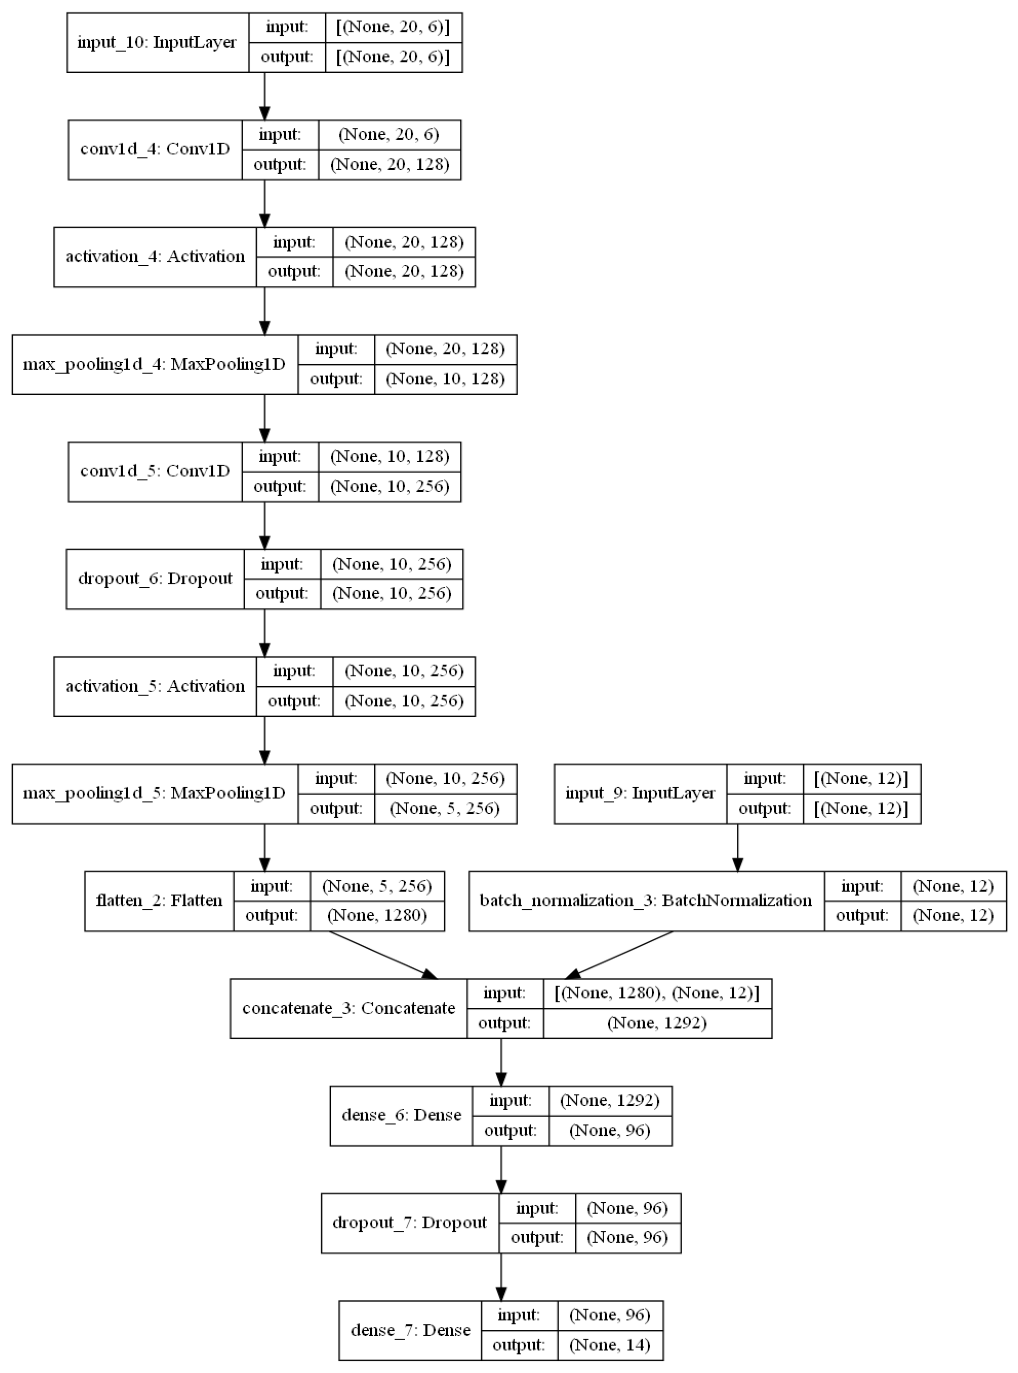

Model imported

..Evaluating the model..
1570/1570 [==============================] - 1s 828us/step - loss: 1.1340
[CNN - joined] model ready!


In [24]:
params = {'batch_size': 32, 'eval_batch':1, 'epochs': 20, 'verbose': None, 
          'validation_split': 0.2, 'loss': mywloss(freq), 'earlyS':4,
          'f_filter':128, 'f_kernel':2, 's_kernel':2, 't_kernel':5, 'f_drop':0.5, 
          's_filter':256, 'f_dense':96, 's_drop':0.3, 't_filter':64}
cnn, loss, n_epochs = runDeepModel(cnn_input, fold=folder, name='CNN - joined', 
                                   params=params, force_train=False, show_plots=True)

Trying to load a previous model
Model scheme -> Exotic


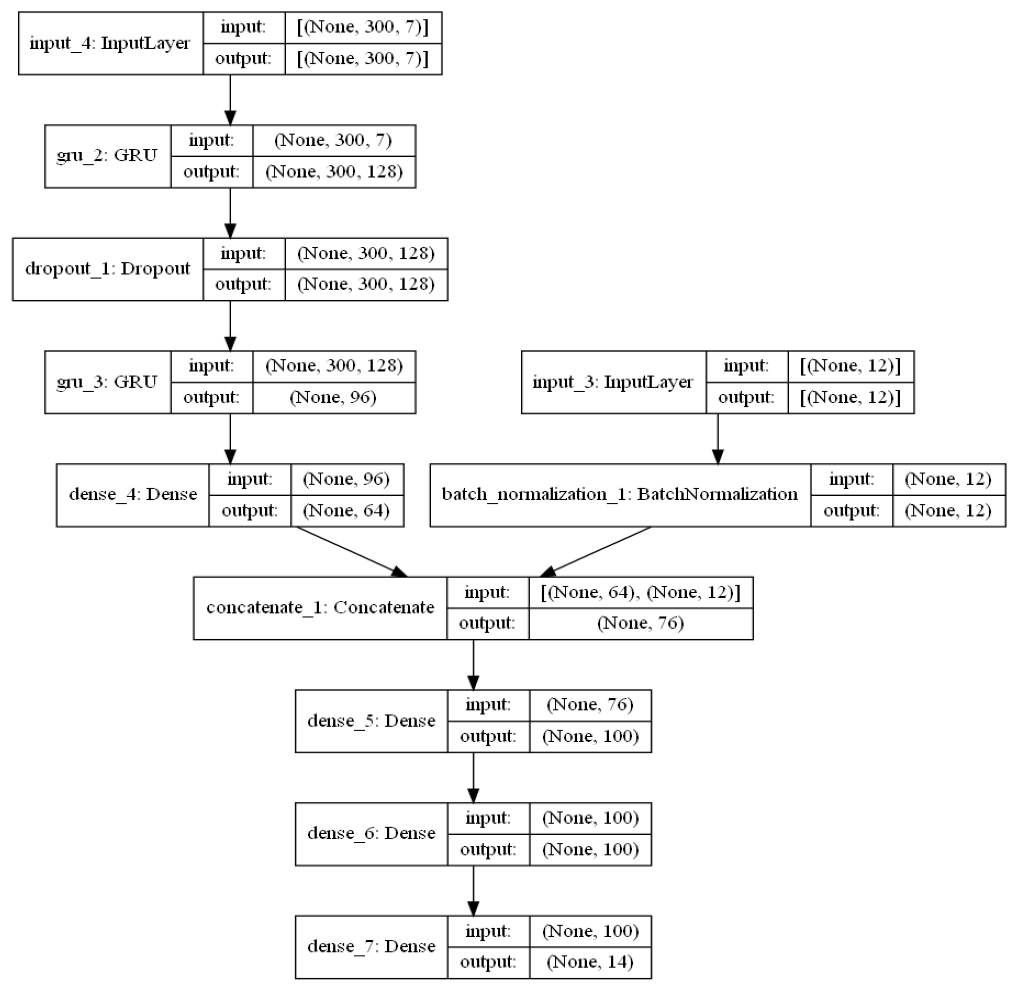

Model imported

..Evaluating the model..
1570/1570 [==============================] - 47s 28ms/step - loss: 1.0292 0s - loss: 1.02
[Exotic] model ready!


In [28]:
freq = getFreq(metadata, 'target')
params = {'batch_size': 64, 'eval_batch':1, 'epochs': 20, 'verbose': None, 
          'validation_split': 0.2, 'loss': mywloss(freq), 'earlyS':4,
          'f_gru':96, 'f_drop':0.3, 's_gru':156, 'f_dense':32, 's_dense':32, 
          's_drop':0.1, 't_dense':64}
exotic, loss, n_epochs = runDeepModel(exotic_input, fold=folder, name='Exotic', params=params, 
                                      force_train=False, show_plots=True)

## Random search for the optimal hyperparameters

In [30]:
params = {'batch_size': 16, 'eval_batch': 32, 'epochs': 30, 'verbose': None, 'earlyS': 3,
          'validation_split': 0.2, 'loss': mywloss(freq), 'mask_value': -10.}
randomSearch(cnn_input, folder=folder, name='Exotic', params=params, n_iter=150)


..Evaluating the model..
33/33 [==============================] - 0s 3ms/step - loss: 1.0104


Iteration:2/150
Params:
          0         1         2         3  ...         5        6       7         8
0  f_filter  f_kernel  s_kernel  t_kernel  ...  s_filter  f_dense  s_drop  t_filter
1       256         4         1         4  ...       156       32     0.5       128

[2 rows x 9 columns]
[CNN - joined] model forced to train!

..Evaluating the model..
33/33 [==============================] - 0s 3ms/step - loss: 2.5162


Iteration:3/150
Params:
          0         1         2         3  ...         5        6       7         8
0  f_filter  f_kernel  s_kernel  t_kernel  ...  s_filter  f_dense  s_drop  t_filter
1        32         4         1         3  ...       256       32     0.2       128

[2 rows x 9 columns]
[CNN - joined] model forced to train!

..Evaluating the model..
33/33 [==============================] - 0s 3ms/step - loss: 0.9858


Iteration:4/150
Params:
          0     

In [46]:
showRandomSearch_results(folder=folder)

CNN - joined_complete+:  +----+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+---------+
|    |   f_fil |   f_ker |   s_ker |   t_ker |   f_dro |   s_fil |   f_den |   s_dro |   t_fil |    test_ |   Epoch |
|----+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+---------|
|  0 |      96 |       3 |       1 |       4 |     0.3 |     156 |      96 |     0.1 |     128 | 0.989045 |      11 |
+----+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+---------+

CNN - joined_complete:  +----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|    |   f_fil |   f_ker |   s_ker |   t_ker |   f_dro |   s_fil |   f_den |   s_dro |   t_fil |   test_ |   Epoch |
|----+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------|
|  0 |   